## Importando a base de dados

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('tips.csv')

In [3]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


## Traduções

In [4]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [5]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip' : 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day' : 'dia', 
    'time' : 'hora', 
    'size' : 'total_de_pessoas'
}

In [6]:
type(dados)

pandas.core.frame.DataFrame

In [7]:
gorjetas = dados.rename(columns = renomear)

In [8]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [9]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
sim_nao = { 
    'No': 'Não',
    'Yes' : 'Sim'
}

In [11]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [12]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [13]:
gorjetas.dia.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [14]:
dias = {
    'Sun': 'Domingo',
    'Sat': 'Sábado',
    'Fri': 'Sexta',
    'Thur': 'Quinta'
}

In [15]:
gorjetas.dia = gorjetas.dia.map(dias)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [16]:
gorjetas.dia.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [17]:
gorjetas.hora.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [18]:
hora_dia = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'
}

In [19]:
gorjetas.hora = gorjetas.hora.map(hora_dia)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


## Importando o Seaborn

In [20]:
import seaborn as sns

In [21]:
!pip show seaborn

Name: seaborn
Version: 0.11.2
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@gmail.com
License: BSD (3-clause)
Location: c:\users\pichau\aanaconda3\lib\site-packages
Requires: matplotlib, numpy, pandas, scipy
Required-by: missingno, pandas-profiling


## Análise I - Valor da conta e gorjeta

In [22]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia', 'hora',
       'total_de_pessoas'],
      dtype='object')

<AxesSubplot:xlabel='valor_da_conta', ylabel='gorjeta'>

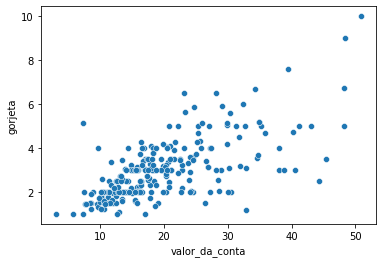

In [23]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)
valor_gorjeta

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta.**

In [24]:
print('A base de dados contém {} registros. \n'.format(gorjetas.shape[0]))
print('Registros não nulos:')
gorjetas.count()

A base de dados contém 244 registros. 

Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia                 244
hora                244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [25]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


In [26]:
gorjetas['porcentagem'] = (gorjetas['gorjeta'] / gorjetas['valor_da_conta']).round(2)

In [27]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


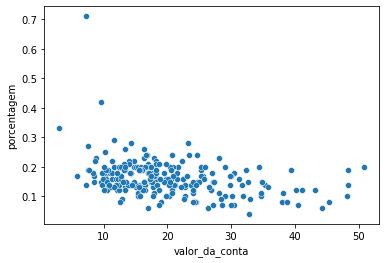

In [28]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

**Visualmente, o valor da conta é levemente não proporcional ao valor da gorjeta.**

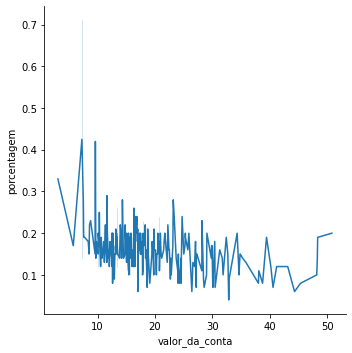

In [29]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

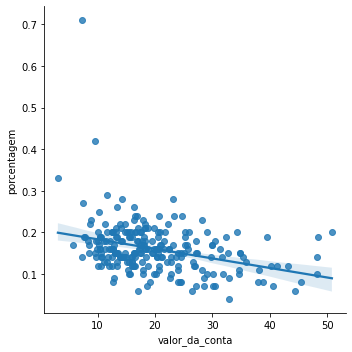

In [30]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

## Análise II - Sobremesa

In [31]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [32]:
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_da_conta,gorjeta,sobremesa,dia,hora,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [33]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [34]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


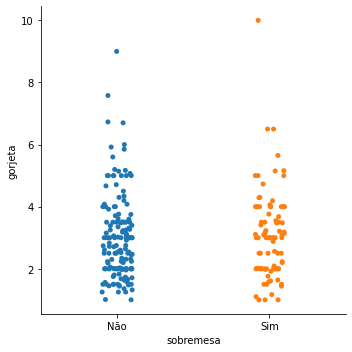

In [35]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

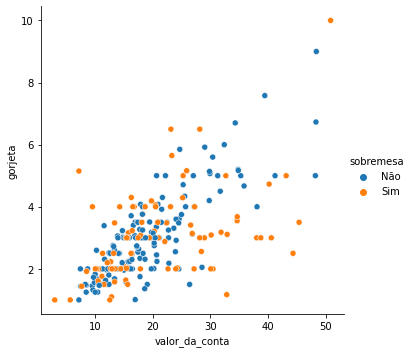

In [36]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

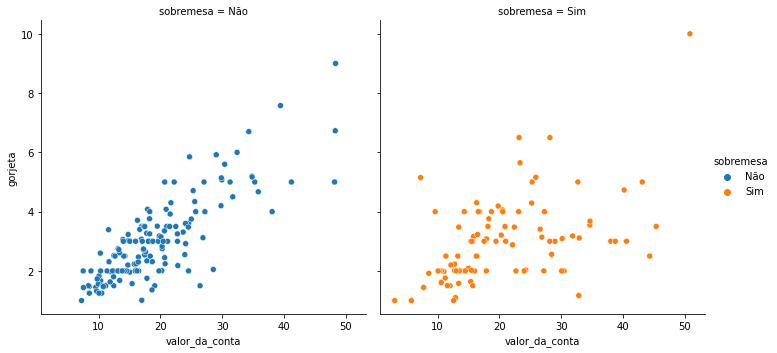

In [37]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

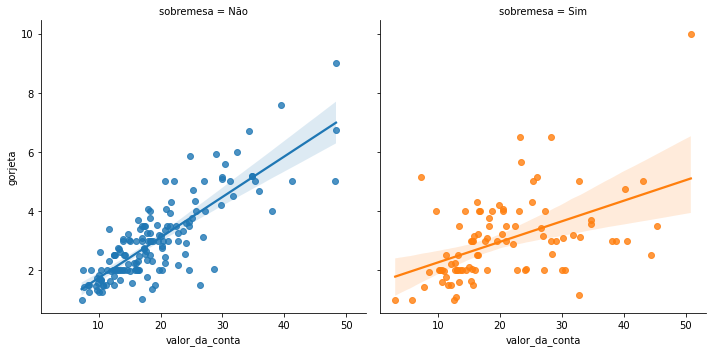

In [40]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

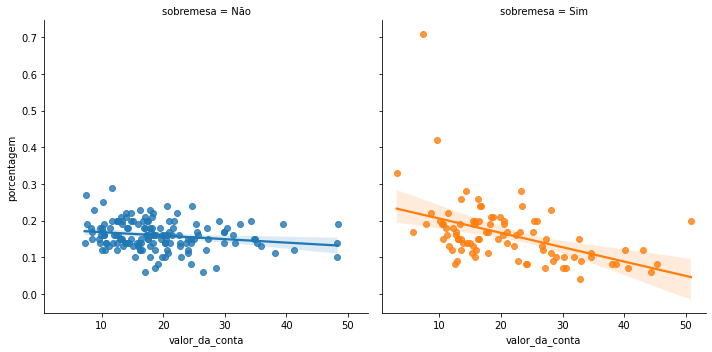

In [41]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

**Visualmente existe uma diferença no valor da gorjeta daqueles que pediram e não pediram sobremesa.**

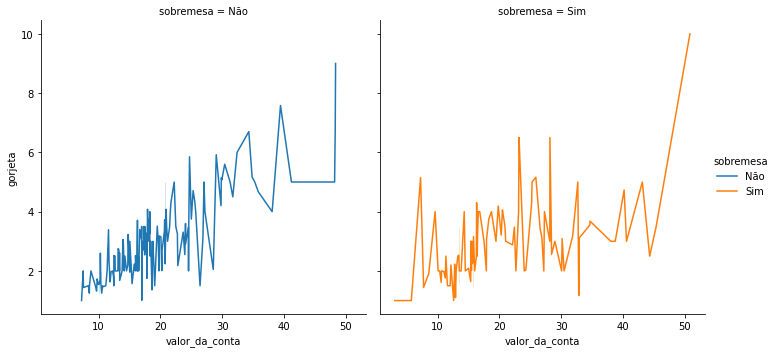

In [42]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

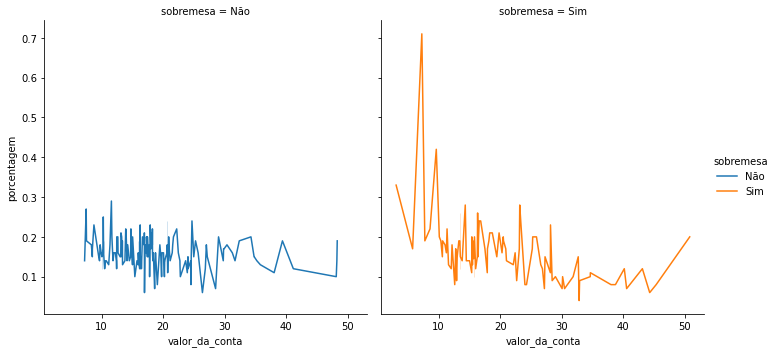

In [43]:
sns.relplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

### Teste de hipótese
 **H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos.**

 **H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos.**

In [44]:
from scipy.stats import ranksums

In [46]:
gorjetas.query("sobremesa == 'Sim'").porcentagem

56     0.08
58     0.16
60     0.16
61     0.14
62     0.18
       ... 
234    0.19
236    0.08
237    0.04
240    0.07
241    0.09
Name: porcentagem, Length: 93, dtype: float64

In [47]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [48]:
ranksums(sobremesa, sem_sobremesa)

RanksumsResult(statistic=-0.6331073145314825, pvalue=0.5266635660124415)

In [51]:
r = ranksums(sobremesa, sem_sobremesa)
print('O valor do p-value é {}'.format(r.pvalue.round(5)))

O valor do p-value é 0.52666


 **H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos.**

## Análise III - Dia da semana

In [53]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia,hora,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [55]:
gorjetas.dia.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

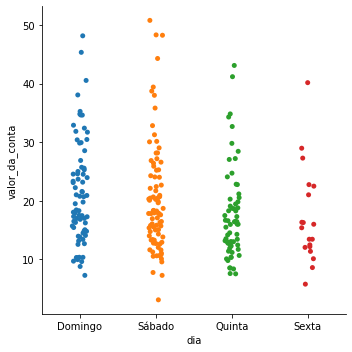

In [56]:
sns.catplot(x='dia', y='valor_da_conta', data=gorjetas)

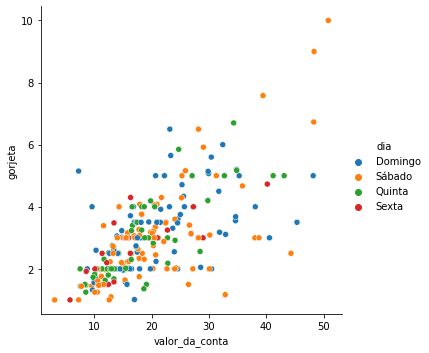

In [57]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia', data=gorjetas)

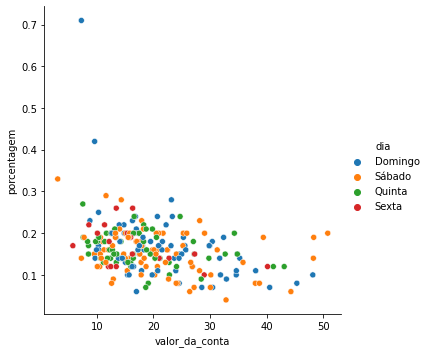

In [58]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia', data=gorjetas)

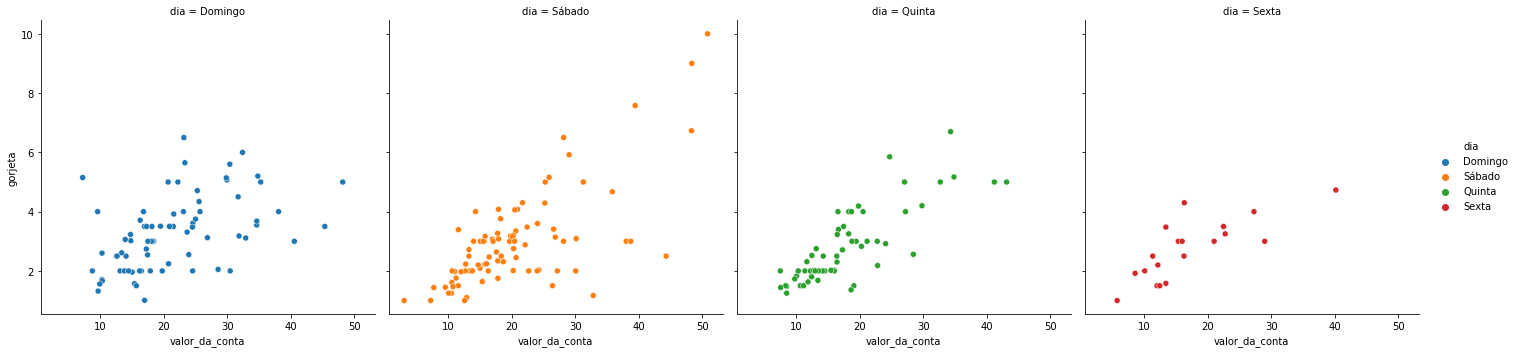

In [59]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia', col='dia', data=gorjetas)

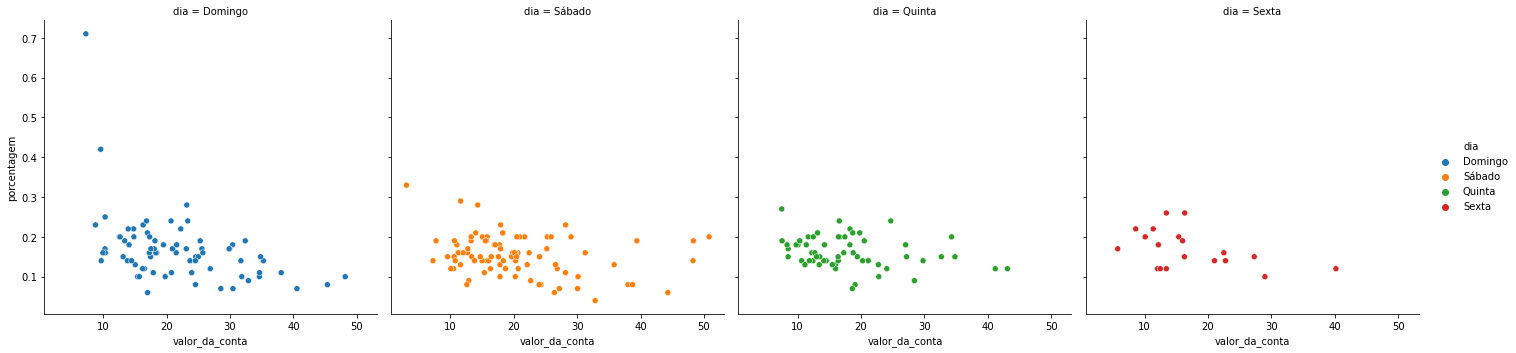

In [60]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia', col='dia', data=gorjetas)

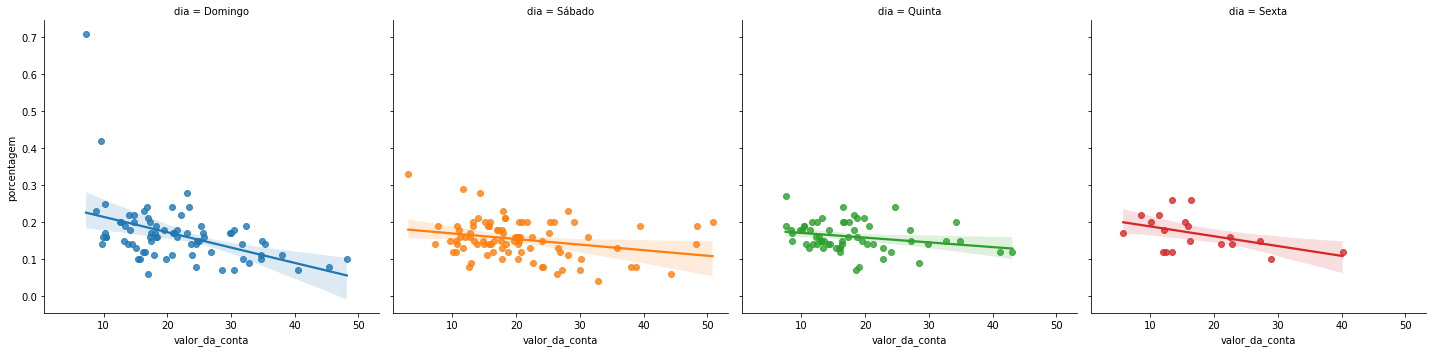

In [61]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia', col='dia', data=gorjetas)

In [73]:
media_geral_gorjetas = gorjetas.gorjeta.mean()
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

A média geral das gorjetas é de 2.9982786885245902


In [81]:
gorjetas.groupby(['dia']).mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
dia,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


In [82]:
gorjetas.groupby(['dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [87]:
print('Frequência dos dias:')
gorjetas.dia.value_counts()

Frequência dos dias:


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia, dtype: int64

### Teste de hipótese
 **H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sábado e domingo.**

 **H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no sábado e domingo.**

In [90]:
valor_conta_domingo = gorjetas.query("dia == 'Domingo'").valor_da_conta
valor_conta_sabado = gorjetas.query("dia == 'Sábado'").valor_da_conta

In [97]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue.round(5)))

O valor do p-value é 0.35767


**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sábado e domingo.**

## Análise IV - Hora do dia

In [98]:
gorjetas.hora.unique()

array(['Jantar', 'Almoço'], dtype=object)

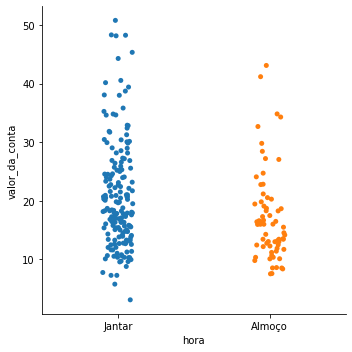

In [100]:
sns.catplot(x='hora', y='valor_da_conta', data=gorjetas)

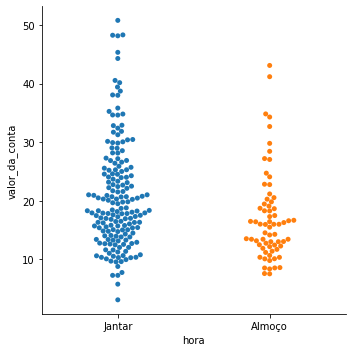

In [109]:
sns.catplot(x='hora', y='valor_da_conta', kind='swarm', data=gorjetas)

<AxesSubplot:xlabel='hora', ylabel='valor_da_conta'>

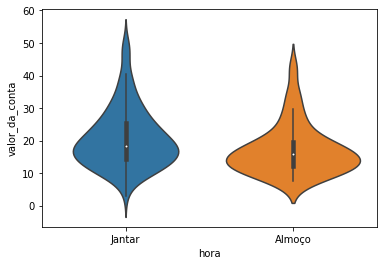

In [113]:
sns.violinplot(x='hora', y='valor_da_conta', data=gorjetas)

<AxesSubplot:xlabel='hora', ylabel='valor_da_conta'>

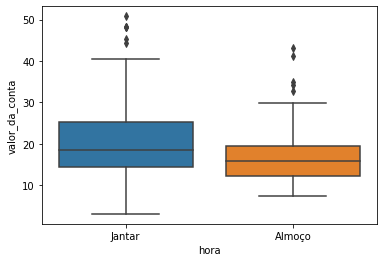

In [112]:
sns.boxplot(x='hora', y='valor_da_conta', data=gorjetas)

C:\Users\Pichau\aanaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='valor_da_conta'>

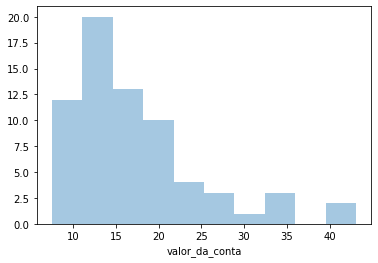

In [117]:
almoco = gorjetas.query("hora == 'Almoço'").valor_da_conta
sns.distplot(almoco, kde=False)

<AxesSubplot:xlabel='valor_da_conta'>

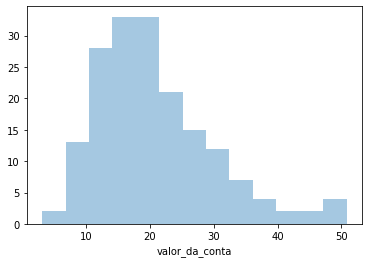

In [119]:
jantar = gorjetas.query("hora == 'Jantar'").valor_da_conta
sns.distplot(jantar, kde=False)

In [122]:
gorjetas.groupby(['hora']).mean()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
hora,,,,
Almoço,17.168676,2.728088,2.411765,0.163971
Jantar,20.797159,3.102670,2.630682,0.159773


In [123]:
gorjetas.groupby(['hora']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


### Teste de hipótese
 **H<sup>null</sup>**

>**A distribuição do valor da conta é igual no jantar e no almoço.**

 **H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no jantar e no almoço.**

In [126]:
r2 = ranksums(jantar, almoco)
print('O valor do p-value é de {}'.format(r2.pvalue.round(5)))

O valor do p-value é de 0.00118


 **H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no jantar e no almoço.**